In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

In [83]:
#This line is required to display visualizations in the browser
%matplotlib inline

In [84]:
from skimage import data
from skimage.color import rgb2gray
from PIL import Image

In [85]:
# importing tools for having interactive UI for user in browser
from ipywidgets import interact,interactive,interact_manual

Now, we have "gray_images", a dictionary that stores the matric associated with each image after converting to greyscale. Each time a new image is loaded, its appended to this dictionary before use

In [86]:
gray_images = {
        "wallpaper2"  : np.array(Image.open("wallpaper2.jpg").convert('L'))
}

def showSourceImage(img_name):
        plt.imshow(gray_images[img_name])

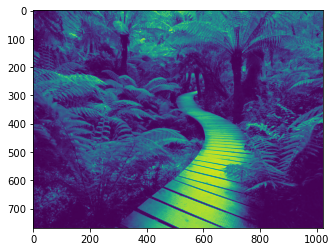

<function __main__.showSourceImage(img_name)>

In [87]:
interact(showSourceImage, img_name=list(gray_images.keys()))

In [88]:
# python module that performs SVD
from numpy.linalg import svd

In [89]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, 1D array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    return reconst_matrix,s

The following function returns the number of singular values present after performing SVD along with the maximum and minimum singular values among them

In [90]:
def getSingularValInfo(image):
    U,s,V = svd(image,full_matrices=False)
    return len(s), s[0], s[-1]

In [91]:
def compress_show_gray_images(img_name,k):
    """
     compresses gray scale images and display the reconstructed image.
    """
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)

    if k != 0:
        print("k = "+str(k) + "\nMaxSV = " + str(s[0]) + "\nMinSV = " + str(s[k-1]))
    else:
        print("k = 0")

    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    print("compression Ratio = " + str(compression_ratio))
    
    plt.imshow(X=reconst_img, cmap='gray')

Modify the path to the image file as well as the image name as per our choice. If the image is used for the first time, its appended to the 'gray_images' dictionary along with its matric

In [92]:
path = "./"
fileName_ext = "Prabodh T R.jpeg"
fileName = fileName_ext.split('.')[0]
pic = Image.open(path + fileName_ext)

if fileName not in gray_images:
    gray_images.update({fileName : np.array(pic.convert('L'))})

In [93]:
(numberOfSVs, maxVal, minVal)= getSingularValInfo(gray_images[fileName])
print("Source image SVD information:\nSingular Values = " + str(numberOfSVs))
print("MaxVal = " + str(maxVal))
print("MinVal = " + str(minVal))

Source image SVD information:
Singular Values = 237
MaxVal = 45106.38854490098
MinVal = 0.9266109450827615


call the compress_show_gray_images() with different values of k and notice the differences where 'k' is the number of singular values that is considered while performing the low rank approximation of the image matric for image compression 

k = 20
MaxSV = 45106.38854490098
MinSV = 531.7196704080316
compression Ratio = 15.247085746978474


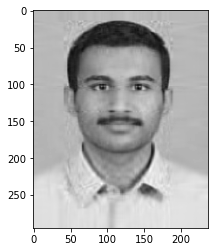

In [94]:
compress_show_gray_images(img_name=fileName, k=20)

For the ease of performing the effect of k or the number of singular values chosen, while compressing the image, we have added an interactive widget that could be accessed from the jupyterLab when opened from the browser. It provides a slider that allows user to change the value of 'k' dynamically and see the effect

k = 119
MaxSV = 45106.38854490098
MinSV = 50.40152186045393
compression Ratio = 90.72016019452192


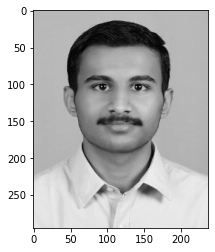

In [95]:
interact(compress_show_gray_images,img_name=fileName,k=(1,numberOfSVs));